In [556]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

sns.set_theme()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, auc, roc_curve, log_loss
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

import optuna

In [558]:
df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

In [559]:
df1 = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [560]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [561]:
df1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


# Work On Train Dataset

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [563]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [564]:
df.duplicated().sum()

0

In [565]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='person_age'>

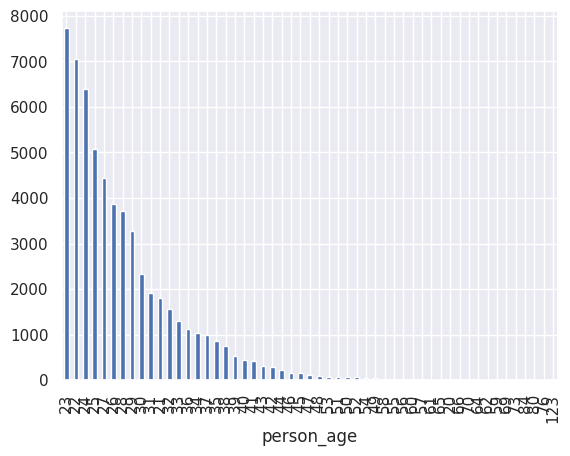

In [566]:
df['person_age'].value_counts().plot(kind = 'bar')

In [567]:
df['person_age'].unique()

array([ 37,  22,  29,  30,  27,  25,  21,  35,  31,  26,  28,  32,  23,
        24,  33,  44,  38,  43,  46,  48,  36,  41,  34,  40,  47,  42,
        51,  50,  39,  56,  60,  49,  58,  54,  45,  59,  65,  53,  55,
        57,  52,  62,  64,  84,  70,  66,  73,  69,  61,  20,  80,  76,
       123])

<Axes: >

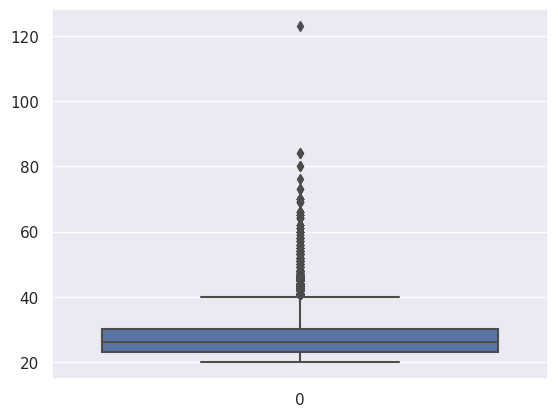

In [568]:
sns.boxplot(df['person_age'])

In [569]:
# Calculate the 25th and 75th percentiles
percentile25 = df['person_age'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['person_age'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['person_age'] = np.where(
    new_df['person_age'] > uplimit, uplimit,
    np.where(new_df['person_age'] < lolimit, lolimit, new_df['person_age'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 23.0
75th Percentile: 30.0
Upper Limit: 40.5 Lower Limit: 12.5
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0          35000                  RENT                0.0   
1   1        22.0          56000                   OWN                6.0   
2   2        29.0          28800                   OWN                8.0   
3   3        30.0          70000                  RENT               14.0   
4   4        22.0          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_p

<Axes: >

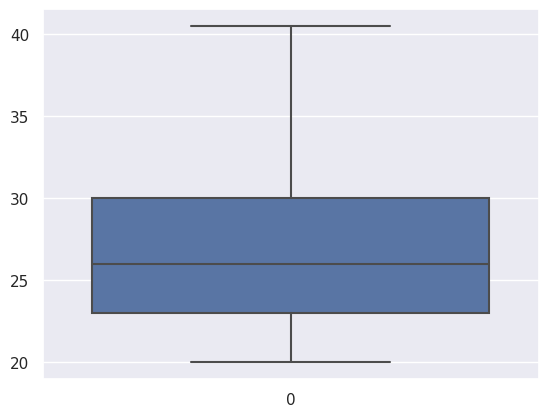

In [570]:
sns.boxplot(df['person_age'])

<Axes: >

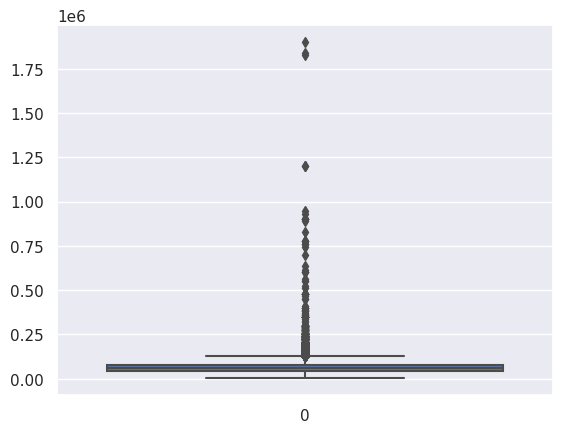

In [571]:
sns.boxplot(df['person_income'])

In [572]:
# Calculate the 25th and 75th percentiles
percentile25 = df['person_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['person_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['person_income'] = np.where(
    new_df['person_income'] > uplimit, uplimit,
    np.where(new_df['person_income'] < lolimit, lolimit, new_df['person_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 42000.0
75th Percentile: 75600.0
Upper Limit: 126000.0 Lower Limit: -8400.0
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.

<Axes: >

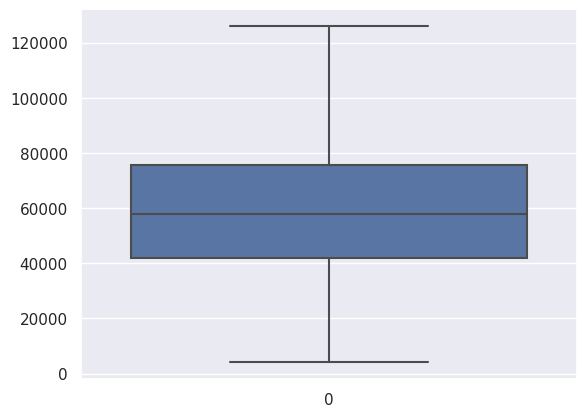

In [573]:
sns.boxplot(df['person_income'])

<Axes: xlabel='person_home_ownership'>

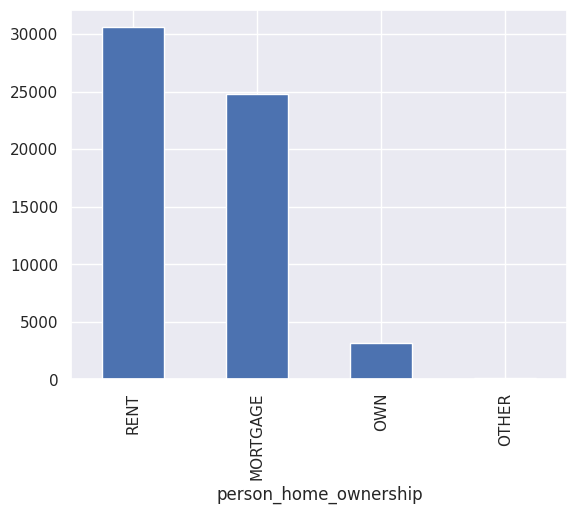

In [574]:
df['person_home_ownership'].value_counts().plot(kind = 'bar')

In [575]:
df['person_home_ownership'] = df['person_home_ownership'].str.replace('OTHER', 'OWN', regex=False)


<Axes: xlabel='person_home_ownership'>

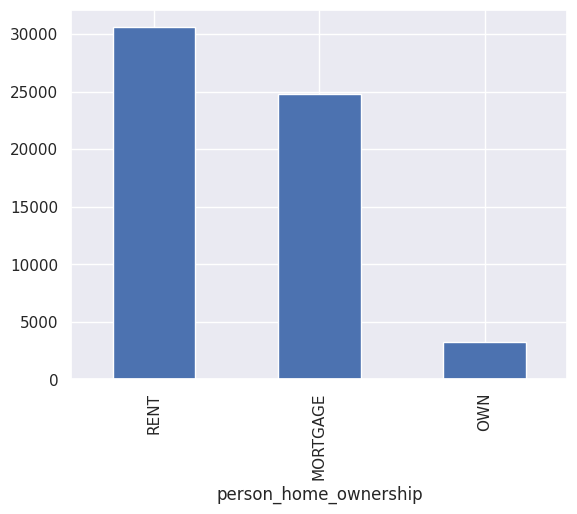

In [576]:
df['person_home_ownership'].value_counts().plot(kind = 'bar')

In [577]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


<Axes: >

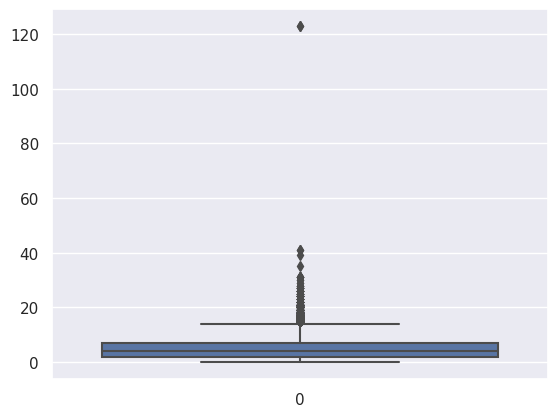

In [578]:
sns.boxplot(df['person_emp_length'])

In [579]:
# Calculate the 25th and 75th percentiles
percentile25 = df['person_emp_length'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['person_emp_length'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['person_emp_length'] = np.where(
    new_df['person_emp_length'] > uplimit, uplimit,
    np.where(new_df['person_emp_length'] < lolimit, lolimit, new_df['person_emp_length'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 2.0
75th Percentile: 7.0
Upper Limit: 14.5 Lower Limit: -5.5
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_per

<Axes: >

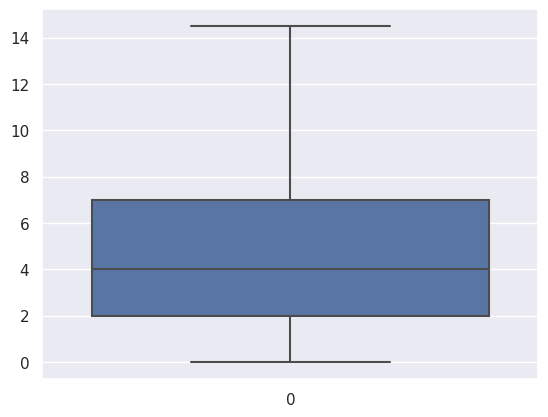

In [580]:
sns.boxplot(df['person_emp_length'])

<Axes: xlabel='loan_intent'>

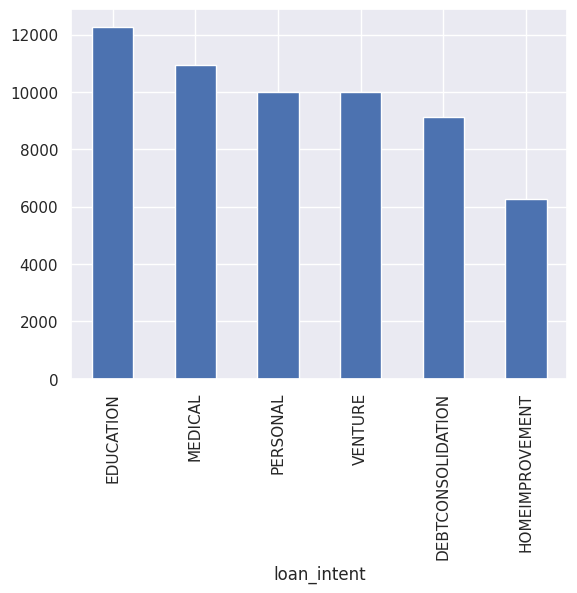

In [581]:
df['loan_intent'].value_counts().plot(kind = 'bar')

<Axes: xlabel='loan_grade'>

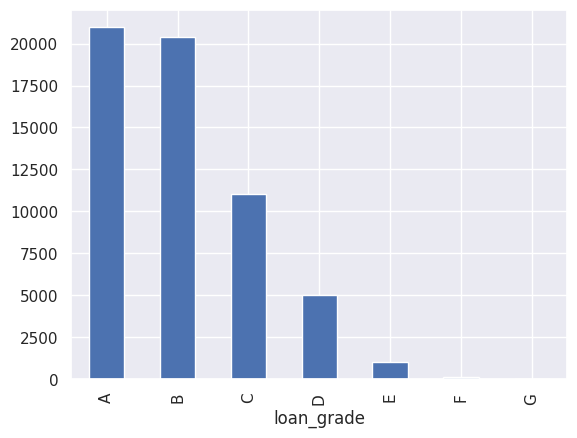

In [582]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [583]:
df['loan_grade'] = df['loan_grade'].str.replace('F', 'G', regex=False)

<Axes: xlabel='loan_grade'>

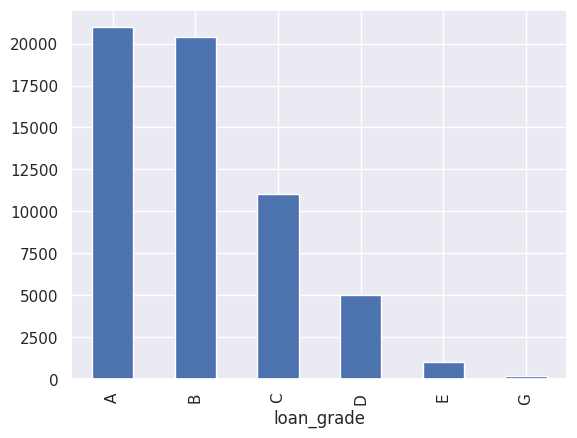

In [584]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [585]:
df['loan_grade'] = df['loan_grade'].str.replace('G', 'E', regex=False)

<Axes: xlabel='loan_grade'>

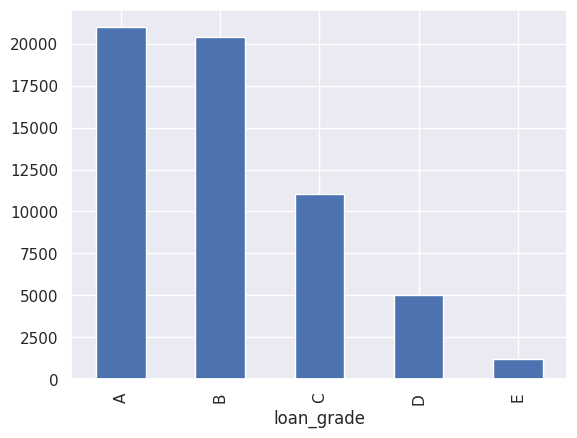

In [586]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [587]:
df['loan_grade'] = df['loan_grade'].str.replace('E', 'D', regex=False)

<Axes: xlabel='loan_grade'>

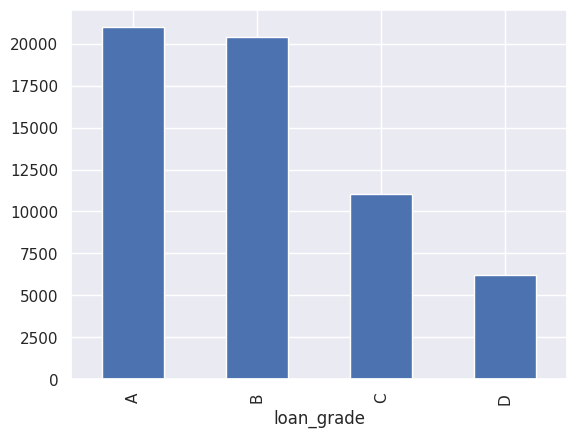

In [588]:
df['loan_grade'].value_counts().plot(kind = 'bar')

In [589]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30.0,70000.0,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


<Axes: >

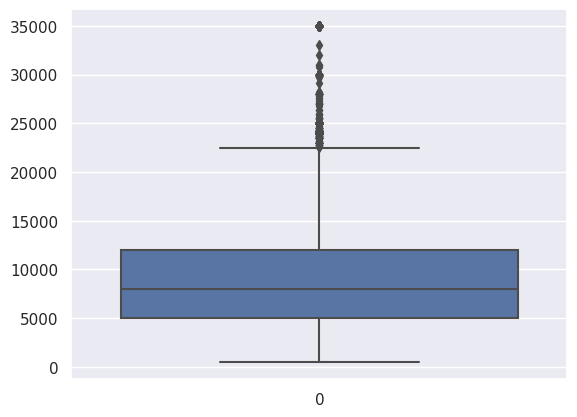

In [590]:
sns.boxplot(df['loan_amnt'])

In [591]:
# Calculate the 25th and 75th percentiles
percentile25 = df['loan_amnt'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['loan_amnt'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['loan_amnt'] = np.where(
    new_df['loan_amnt'] > uplimit, uplimit,
    np.where(new_df['loan_amnt'] < lolimit, lolimit, new_df['loan_amnt'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 5000.0
75th Percentile: 12000.0
Upper Limit: 22500.0 Lower Limit: -5500.0
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92                 0.10

<Axes: >

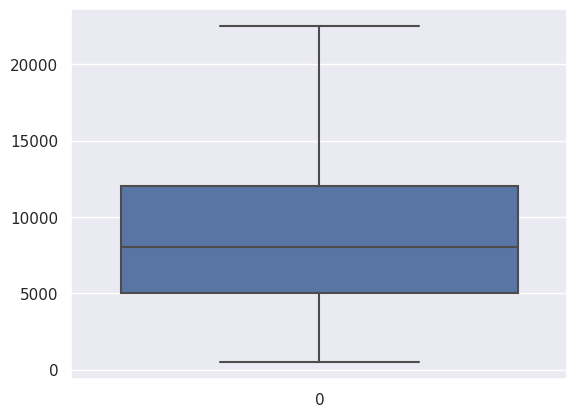

In [592]:
sns.boxplot(df['loan_amnt'])

<Axes: >

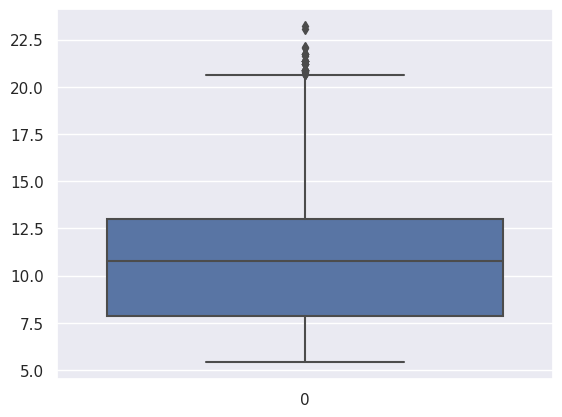

In [593]:
sns.boxplot(df['loan_int_rate'])

In [594]:
# Calculate the 25th and 75th percentiles
percentile25 = df['loan_int_rate'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['loan_int_rate'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['loan_int_rate'] = np.where(
    new_df['loan_int_rate'] > uplimit, uplimit,
    np.where(new_df['loan_int_rate'] < lolimit, lolimit, new_df['loan_int_rate'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 7.88
75th Percentile: 12.99
Upper Limit: 20.655 Lower Limit: 0.21499999999999897
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92              

<Axes: >

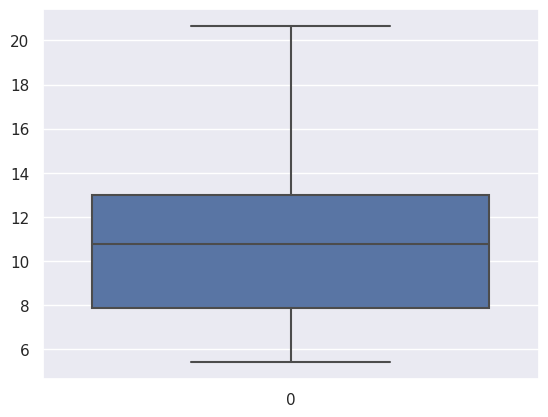

In [595]:
sns.boxplot(df['loan_int_rate'])

<Axes: >

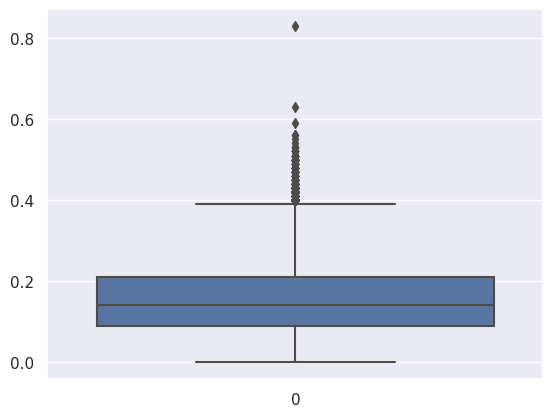

In [596]:
sns.boxplot(df['loan_percent_income'])

In [597]:
# Calculate the 25th and 75th percentiles
percentile25 = df['loan_percent_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['loan_percent_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['loan_percent_income'] = np.where(
    new_df['loan_percent_income'] > uplimit, uplimit,
    np.where(new_df['loan_percent_income'] < lolimit, lolimit, new_df['loan_percent_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 0.09
75th Percentile: 0.21
Upper Limit: 0.39 Lower Limit: -0.09
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92                 0.10   

  cb_

<Axes: >

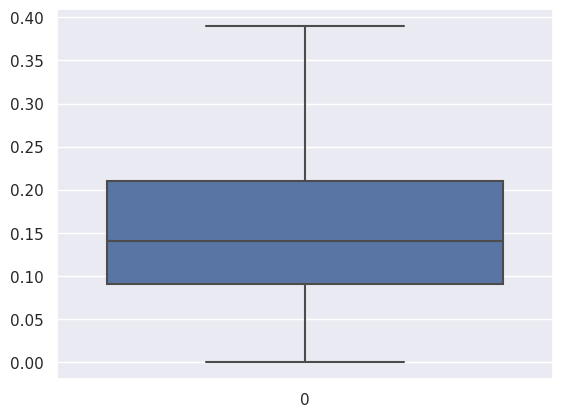

In [598]:
sns.boxplot(df['loan_percent_income'])

<Axes: >

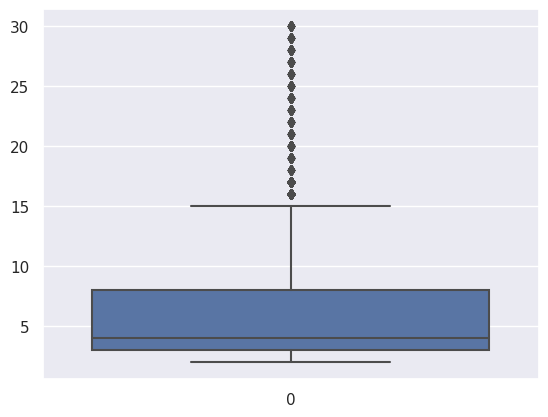

In [599]:
sns.boxplot(df['cb_person_cred_hist_length'])

In [600]:
# Calculate the 25th and 75th percentiles
percentile25 = df['cb_person_cred_hist_length'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['cb_person_cred_hist_length'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['cb_person_cred_hist_length'] = np.where(
    new_df['cb_person_cred_hist_length'] > uplimit, uplimit,
    np.where(new_df['cb_person_cred_hist_length'] < lolimit, lolimit, new_df['loan_percent_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

25th Percentile: 3.0
75th Percentile: 8.0
Upper Limit: 15.5 Lower Limit: -4.5
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0        37.0        35000.0                  RENT                0.0   
1   1        22.0        56000.0                   OWN                6.0   
2   2        29.0        28800.0                   OWN                8.0   
3   3        30.0        70000.0                  RENT               14.0   
4   4        22.0        60000.0                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B     6000.0          11.49                 0.17   
1     MEDICAL          C     4000.0          13.35                 0.07   
2    PERSONAL          A     6000.0           8.90                 0.21   
3     VENTURE          B    12000.0          11.11                 0.17   
4     MEDICAL          A     6000.0           6.92                 0.10   

  cb_per

<Axes: >

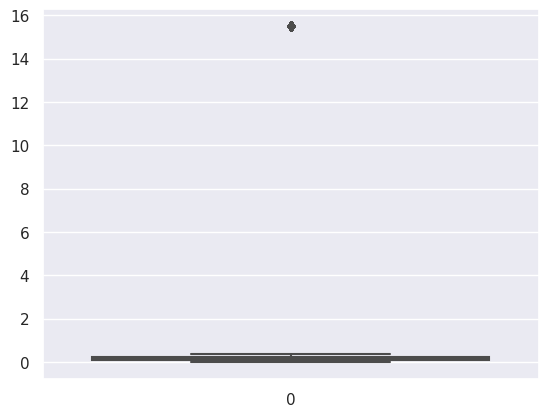

In [601]:
sns.boxplot(df['cb_person_cred_hist_length'])

<Axes: xlabel='cb_person_cred_hist_length', ylabel='Density'>

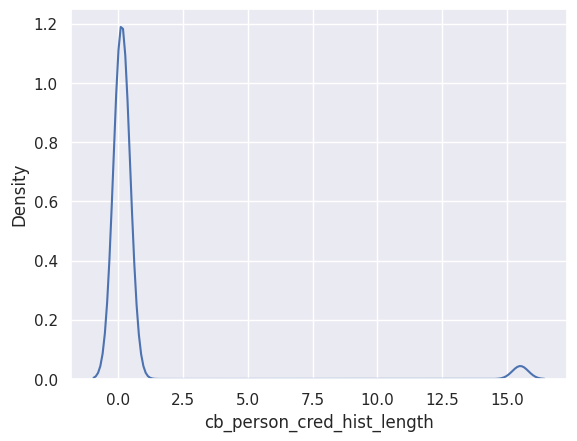

In [602]:
sns.kdeplot(df['cb_person_cred_hist_length'])

In [603]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,0.17,0
1,1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,0.07,0


In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  float64
 2   person_income               58645 non-null  float64
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  float64
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  float64
 12  loan_status                 58645 non-null  int64  
dtypes: float64(7), int64(2), object

In [605]:
df['person_age'] = df['person_age'].astype(int)

In [606]:
df['person_income'] = df['person_income'].astype(int)

In [607]:
df['person_emp_length'] = df['person_emp_length'].astype(int)

In [608]:
df['loan_amnt'] = df['loan_amnt'].astype(int)

In [609]:
df['loan_int_rate'] = df['loan_int_rate'].astype(int)

In [610]:
df['loan_percent_income'] = df['loan_percent_income'].astype(int)

In [611]:
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype(int)

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          58645 non-null  int64 
 1   person_age                  58645 non-null  int64 
 2   person_income               58645 non-null  int64 
 3   person_home_ownership       58645 non-null  object
 4   person_emp_length           58645 non-null  int64 
 5   loan_intent                 58645 non-null  object
 6   loan_grade                  58645 non-null  object
 7   loan_amnt                   58645 non-null  int64 
 8   loan_int_rate               58645 non-null  int64 
 9   loan_percent_income         58645 non-null  int64 
 10  cb_person_default_on_file   58645 non-null  object
 11  cb_person_cred_hist_length  58645 non-null  int64 
 12  loan_status                 58645 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 5.8+ MB


In [613]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,N,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,N,0,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8,0,N,0,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11,0,N,0,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6,0,N,0,0


In [614]:
df.drop(columns =['cb_person_default_on_file','cb_person_cred_hist_length'],inplace = True)

In [615]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8,0,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11,0,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6,0,0


# Work on Test Dataset

In [616]:
df1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [617]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [618]:
df1.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [619]:
df1.duplicated().sum()

0

<Axes: xlabel='person_age'>

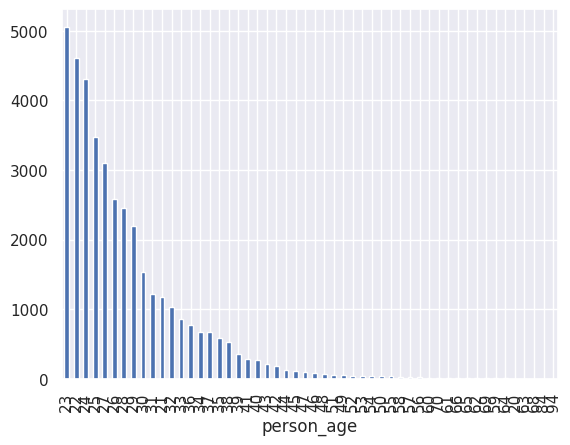

In [620]:
df1['person_age'].value_counts().plot(kind = 'bar')

<Axes: >

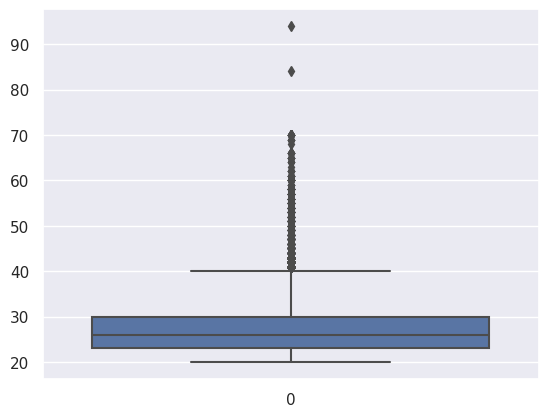

In [621]:
sns.boxplot(df1['person_age'])

In [622]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['person_age'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['person_age'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['person_age'] = np.where(
    new_df['person_age'] > uplimit, uplimit,
    np.where(new_df['person_age'] < lolimit, lolimit, new_df['person_age'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 23.0
75th Percentile: 30.0
Upper Limit: 40.5 Lower Limit: 12.5
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0          69000                  RENT                3.0   
1  58646        26.0          96000              MORTGAGE                6.0   
2  58647        26.0          30000                  RENT                5.0   
3  58648        33.0          50000                  RENT                4.0   
4  58649        26.0         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_le

<Axes: >

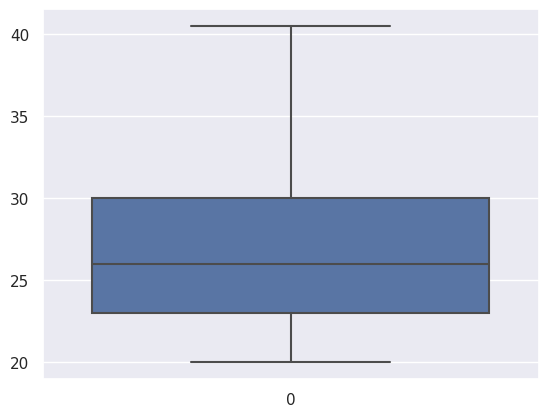

In [623]:
sns.boxplot(df1['person_age'])

In [624]:
df1.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23.0,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26.0,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4


<Axes: >

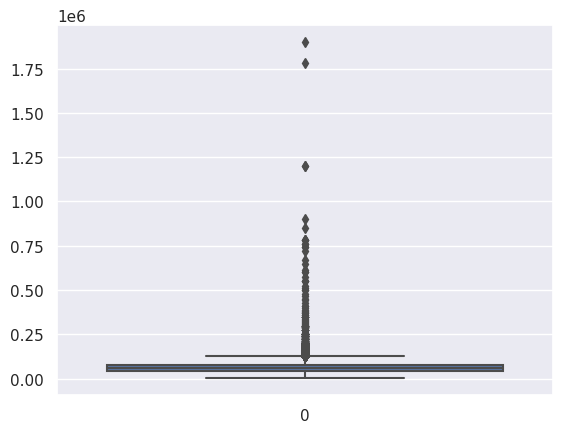

In [625]:
sns.boxplot(df1['person_income'])

In [626]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['person_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['person_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['person_income'] = np.where(
    new_df['person_income'] > uplimit, uplimit,
    np.where(new_df['person_income'] < lolimit, lolimit, new_df['person_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 42000.0
75th Percentile: 75885.0
Upper Limit: 126712.5 Lower Limit: -8827.5
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person

<Axes: >

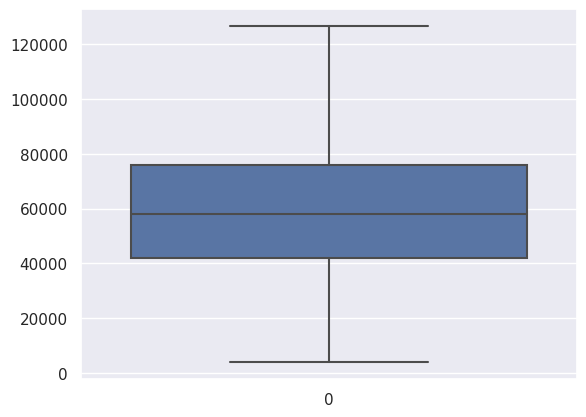

In [627]:
sns.boxplot(df1['person_income'])

<Axes: >

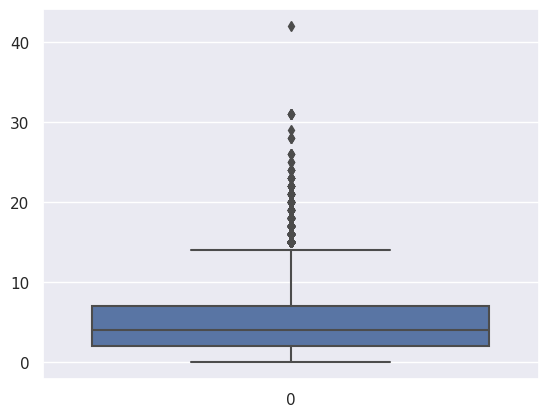

In [628]:
sns.boxplot(df1['person_emp_length'])

In [629]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['person_emp_length'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['person_emp_length'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['person_emp_length'] = np.where(
    new_df['person_emp_length'] > uplimit, uplimit,
    np.where(new_df['person_emp_length'] < lolimit, lolimit, new_df['person_emp_length'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 2.0
75th Percentile: 7.0
Upper Limit: 14.5 Lower Limit: -5.5
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_leng

<Axes: >

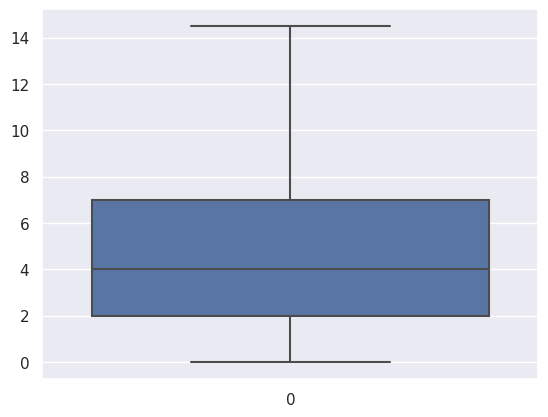

In [630]:
sns.boxplot(df1['person_emp_length'])

<Axes: >

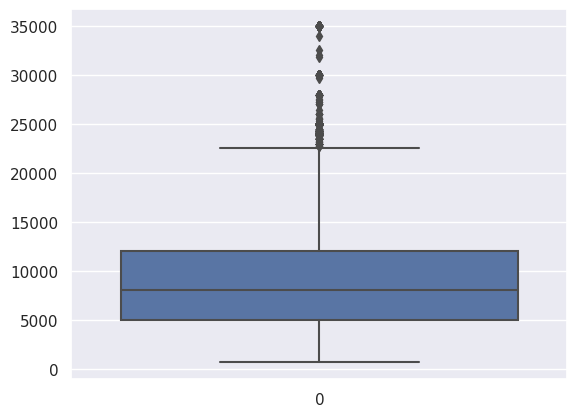

In [631]:
sns.boxplot(df1['loan_amnt'])

In [632]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['loan_amnt'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['loan_amnt'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['loan_amnt'] = np.where(
    new_df['loan_amnt'] > uplimit, uplimit,
    np.where(new_df['loan_amnt'] < lolimit, lolimit, new_df['loan_amnt'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 5000.0
75th Percentile: 12000.0
Upper Limit: 22500.0 Lower Limit: -5500.0
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F    22500.0          15.76   
1           PERSONAL          C    10000.0          12.68   
2            VENTURE          E     4000.0          17.19   
3  DEBTCONSOLIDATION          A     7000.0           8.90   
4    HOMEIMPROVEMENT          D    15000.0          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_c

<Axes: >

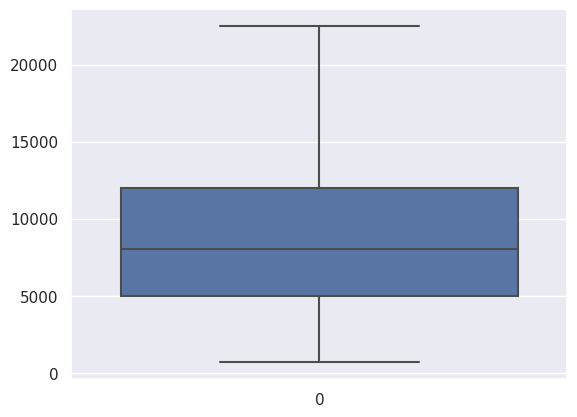

In [633]:
sns.boxplot(df1['loan_amnt'])

<Axes: >

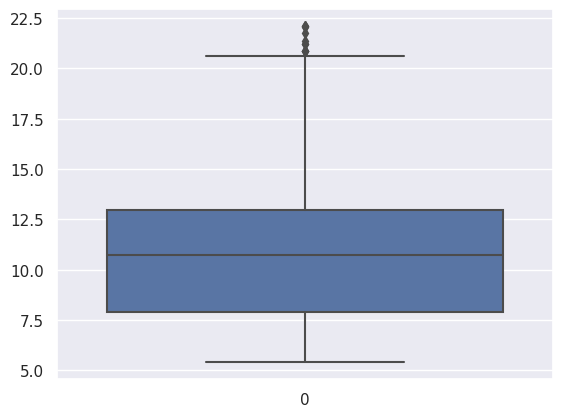

In [634]:
sns.boxplot(df1['loan_int_rate'])

In [635]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['loan_int_rate'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['loan_int_rate'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['loan_int_rate'] = np.where(
    new_df['loan_int_rate'] > uplimit, uplimit,
    np.where(new_df['loan_int_rate'] < lolimit, lolimit, new_df['loan_int_rate'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 7.88
75th Percentile: 12.99
Upper Limit: 20.655 Lower Limit: 0.21499999999999897
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F    22500.0          15.76   
1           PERSONAL          C    10000.0          12.68   
2            VENTURE          E     4000.0          17.19   
3  DEBTCONSOLIDATION          A     7000.0           8.90   
4    HOMEIMPROVEMENT          D    15000.0          16.32   

   loan_percent_income cb_person_default_on_file  cb_p

<Axes: >

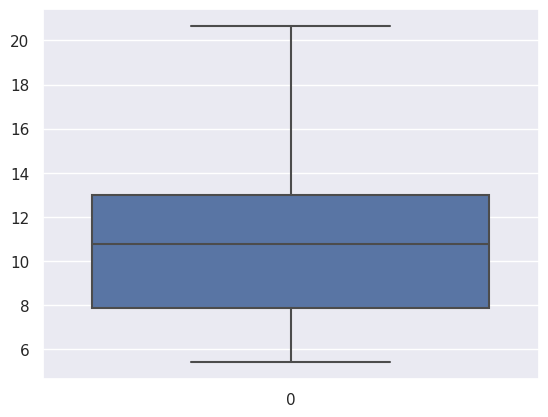

In [636]:
sns.boxplot(df1['loan_int_rate'])

<Axes: >

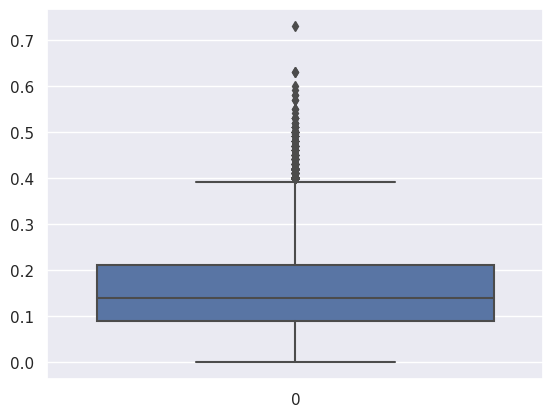

In [637]:
sns.boxplot(df1['loan_percent_income'])

In [638]:
# Calculate the 25th and 75th percentiles
percentile25 = df1['loan_percent_income'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df1['loan_percent_income'].quantile(0.75)
print("75th Percentile:", percentile75)

# Calculate the interquartile range (IQR)
iqr = percentile75 - percentile25

# Calculate the upper and lower limits for outliers
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Create a copy of the DataFrame
new_df = df1.copy()

# Capping the outliers
new_df['loan_percent_income'] = np.where(
    new_df['loan_percent_income'] > uplimit, uplimit,
    np.where(new_df['loan_percent_income'] < lolimit, lolimit, new_df['loan_percent_income'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())
df1 = new_df.copy()

25th Percentile: 0.09
75th Percentile: 0.21
Upper Limit: 0.39 Lower Limit: -0.09
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645        23.0        69000.0                  RENT                3.0   
1  58646        26.0        96000.0              MORTGAGE                6.0   
2  58647        26.0        30000.0                  RENT                5.0   
3  58648        33.0        50000.0                  RENT                4.0   
4  58649        26.0       102000.0              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F    22500.0          15.76   
1           PERSONAL          C    10000.0          12.68   
2            VENTURE          E     4000.0          17.19   
3  DEBTCONSOLIDATION          A     7000.0           8.90   
4    HOMEIMPROVEMENT          D    15000.0          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_l

<Axes: >

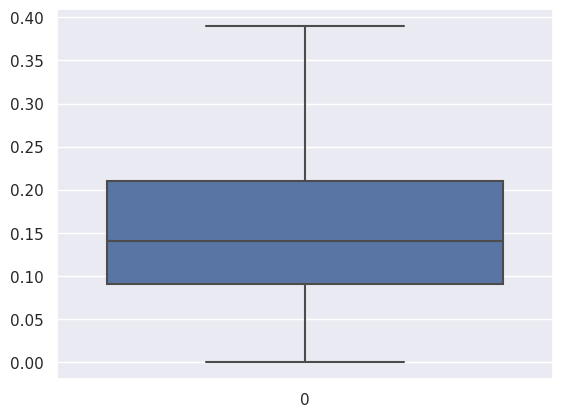

In [639]:
sns.boxplot(df1['loan_percent_income'])

In [640]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,0


In [641]:
df1.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23.0,69000.0,RENT,3.0,HOMEIMPROVEMENT,F,22500.0,15.76,0.36,N,2
1,58646,26.0,96000.0,MORTGAGE,6.0,PERSONAL,C,10000.0,12.68,0.10,Y,4


In [642]:
df1.drop(columns =['cb_person_default_on_file','cb_person_cred_hist_length'],inplace = True)

In [643]:
df1.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,58645,23.0,69000.0,RENT,3.0,HOMEIMPROVEMENT,F,22500.0,15.76,0.36
1,58646,26.0,96000.0,MORTGAGE,6.0,PERSONAL,C,10000.0,12.68,0.10


In [644]:
df1['person_age'] = df1['person_age'].astype(int)

In [645]:

df1['person_income'] = df1['person_income'].astype(int)


In [646]:

df1['person_emp_length'] = df1['person_emp_length'].astype(int)


In [647]:
df1['loan_amnt'] = df1['loan_amnt'].astype(int)


In [648]:

df1['loan_int_rate'] = df1['loan_int_rate'].astype(int)


In [649]:

df1['loan_percent_income'] = df1['loan_percent_income'].astype(int)

In [650]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     39098 non-null  int64 
 1   person_age             39098 non-null  int64 
 2   person_income          39098 non-null  int64 
 3   person_home_ownership  39098 non-null  object
 4   person_emp_length      39098 non-null  int64 
 5   loan_intent            39098 non-null  object
 6   loan_grade             39098 non-null  object
 7   loan_amnt              39098 non-null  int64 
 8   loan_int_rate          39098 non-null  int64 
 9   loan_percent_income    39098 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.0+ MB


<Axes: xlabel='person_home_ownership'>

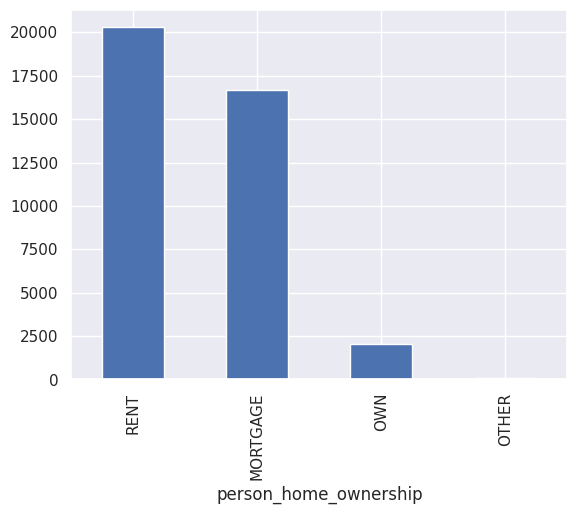

In [651]:
df1['person_home_ownership'].value_counts().plot(kind = 'bar')

In [652]:
df1['person_home_ownership'] = df['person_home_ownership'].str.replace('OTHER', 'OWN', regex=False)

<Axes: xlabel='person_home_ownership'>

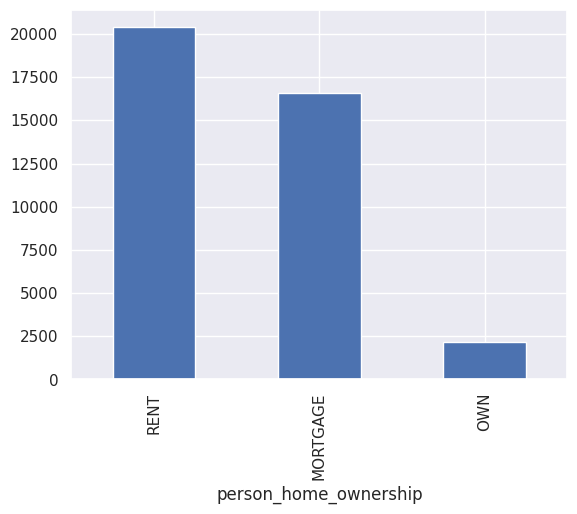

In [653]:
df1['person_home_ownership'].value_counts().plot(kind = 'bar')

<Axes: xlabel='loan_intent'>

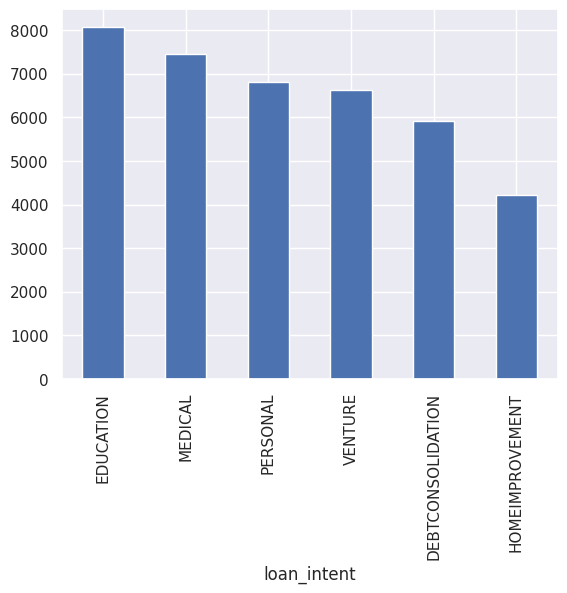

In [654]:
df1['loan_intent'].value_counts().plot(kind = 'bar')

<Axes: xlabel='loan_grade'>

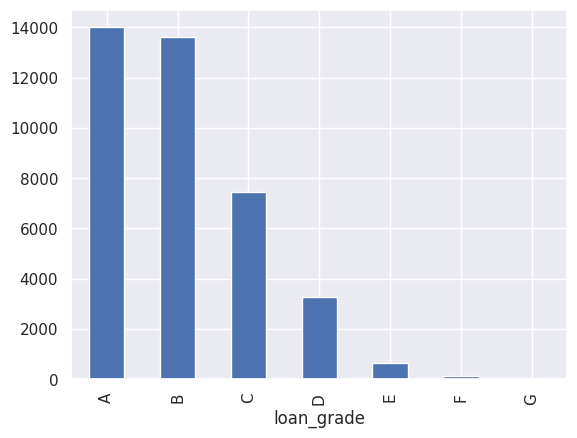

In [655]:
df1['loan_grade'].value_counts().plot(kind = 'bar')

In [656]:
df1['loan_grade'] = df1['loan_grade'].str.replace('F', 'G', regex=False)

In [657]:
df1['loan_grade'] = df1['loan_grade'].str.replace('G', 'E', regex=False)

In [658]:
df1['loan_grade'] = df1['loan_grade'].str.replace('E', 'D', regex=False)

<Axes: xlabel='loan_grade'>

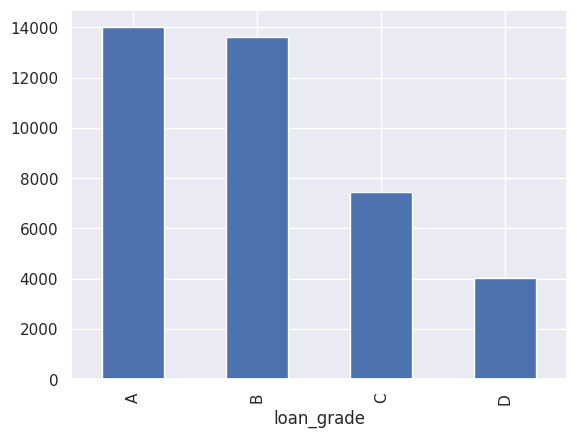

In [659]:
df1['loan_grade'].value_counts().plot(kind = 'bar')

In [660]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11,0,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13,0,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8,0,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11,0,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6,0,0


In [661]:
df1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,D,22500,15,0
1,58646,26,96000,OWN,6,PERSONAL,C,10000,12,0
2,58647,26,30000,OWN,5,VENTURE,D,4000,17,0
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8,0
4,58649,26,102000,RENT,8,HOMEIMPROVEMENT,D,15000,16,0


In [662]:
df.drop(columns=['id'],inplace = True)

In [663]:
df1.drop(columns=['id'],inplace = True)

In [664]:
df.sample(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
15169,32,75000,RENT,14,PERSONAL,A,6000,6,0,0
37899,27,90000,RENT,4,HOMEIMPROVEMENT,C,15000,12,0,0


In [665]:
df1.sample(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
28661,23,52000,MORTGAGE,7,EDUCATION,A,15000,7,0
9017,22,43200,OWN,6,PERSONAL,C,13800,12,0


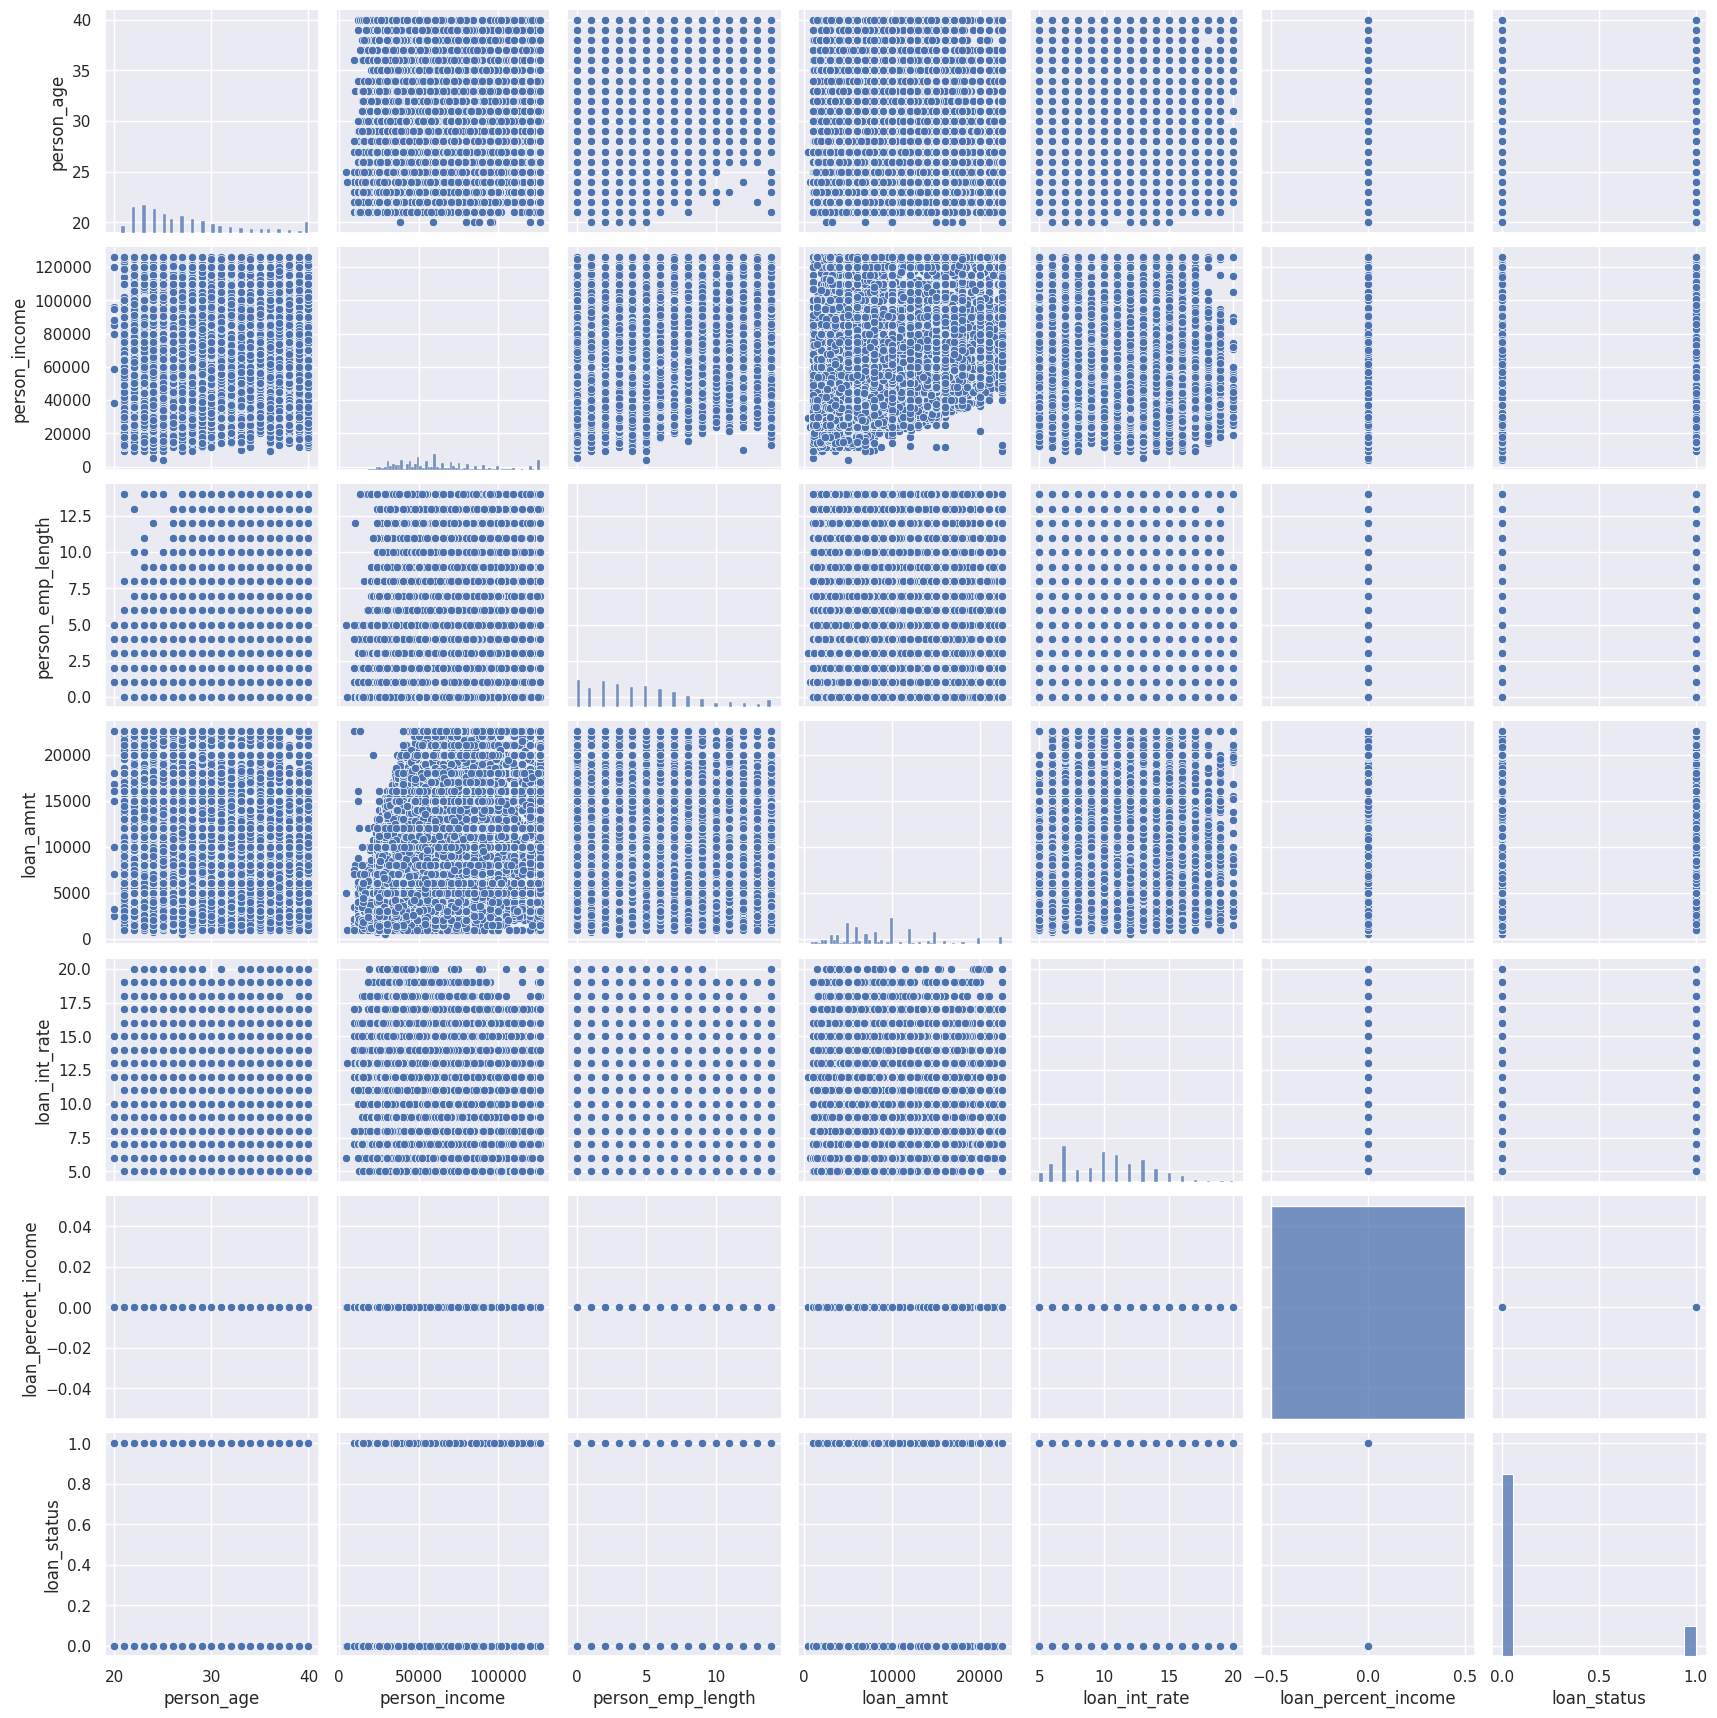

In [666]:
sns.pairplot(df)

# BATAS AWAL

In [667]:
train=df
test=df1
display('train '+str(train.shape),train[:5])
print('')
display('test '+str(test.shape),test[:5])

'train (58645, 10)'

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,37,35000,RENT,0,EDUCATION,B,6000,11,0,0
1,22,56000,OWN,6,MEDICAL,C,4000,13,0,0
2,29,28800,OWN,8,PERSONAL,A,6000,8,0,0
3,30,70000,RENT,14,VENTURE,B,12000,11,0,0
4,22,60000,RENT,2,MEDICAL,A,6000,6,0,0


'test (39098, 9)'

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,23,69000,RENT,3,HOMEIMPROVEMENT,D,22500,15,0
1,26,96000,OWN,6,PERSONAL,C,10000,12,0
2,26,30000,OWN,5,VENTURE,D,4000,17,0
3,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8,0
4,26,102000,RENT,8,HOMEIMPROVEMENT,D,15000,16,0


# labeling

In [668]:
# df.city=df.city.astype('category').cat.codes
train.person_home_ownership=train.person_home_ownership.astype('category').cat.codes
train.loan_intent=train.loan_intent.astype('category').cat.codes
train.loan_grade=train.loan_grade.astype('category').cat.codes
train.loan_amnt=train.loan_amnt.astype('category').cat.codes

test.person_home_ownership=test.person_home_ownership.astype('category').cat.codes
test.loan_intent=test.loan_intent.astype('category').cat.codes
test.loan_grade=test.loan_grade.astype('category').cat.codes
test.loan_amnt=test.loan_amnt.astype('category').cat.codes

display('train '+str(train.shape),train[:5])
print('')
display('test '+str(test.shape),test[:5])

'train (58645, 10)'

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,37,35000,2,0,1,1,164,11,0,0
1,22,56000,1,6,3,2,97,13,0,0
2,29,28800,1,8,4,0,164,8,0,0
3,30,70000,2,14,5,1,331,11,0,0
4,22,60000,2,2,3,0,164,6,0,0


'test (39098, 9)'

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,23,69000,2,3,2,3,445,15,0
1,26,96000,1,6,4,2,254,12,0
2,26,30000,1,5,5,3,91,17,0
3,33,50000,2,4,0,0,180,8,0
4,26,102000,2,8,2,3,357,16,0


Checking Whether train and test both has same columns or not.

Only target columns are extra in train dataset. That's a good news for us

In [669]:
train_absent_columns = [elem for elem in test.columns if elem not in train.columns]
print(train_absent_columns)
test_absent_columns = [elem for elem in train.columns if elem not in test.columns]
print(test_absent_columns)

[]
['loan_status']


Splitting in X and Y

In [670]:
x = train.iloc[:, :-1]
y = train.iloc[:, -1:]

#Splitting data in train, validation datset to evaluate models
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, random_state = 10)

display('x_train '+str(x_train.shape),x_train[:3])
display('y_train '+str(y_train.shape),y_train[:3])
print('')
display('x_val '+str(x_val.shape),x_val[:3])
display('y_val '+str(y_val.shape),y_val[:3])

'x_train (43983, 9)'

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
28812,23,42000,2,4,1,0,295,6,0
26489,28,60000,2,0,0,0,123,8,0
33196,22,50000,2,2,1,1,129,11,0


'y_train (43983, 1)'

,loan_status
28812,0
26489,0
33196,0


'x_val (14662, 9)'

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
58317,21,24000,2,5,1,2,129,14,0
30206,27,33000,0,6,0,1,331,10,0
46693,31,120000,0,0,1,0,229,8,0


'y_val (14662, 1)'

,loan_status
58317,0
30206,1
46693,0


# Data Preprocessing
Checking the shape of datasets

In [671]:
print('No of rows in x_train :',x_train.shape[0])
print('No of cols in x_train :',x_train.shape[1], '\n')

print('No of rows in x_val :',x_val.shape[0])
print('No of cols in x_val :',x_val.shape[1], '\n')

print('No of rows in test :',test.shape[0])
print('No of cols in test :',test.shape[1], '\n')

No of rows in x_train : 43983
No of cols in x_train : 9 

No of rows in x_val : 14662
No of cols in x_val : 9 

No of rows in test : 39098
No of cols in test : 9 



Checking duplicates

In [672]:
print('No. Of Duplicate Values in x_train :',x_train.duplicated().sum())
print('No. Of Duplicate Values in x_val :',x_val.duplicated().sum())
print('No. Of Duplicate Values in test :',test.duplicated().sum())

No. Of Duplicate Values in x_train : 238
No. Of Duplicate Values in x_val : 29
No. Of Duplicate Values in test : 147


Checking NULL Values

<Axes: >

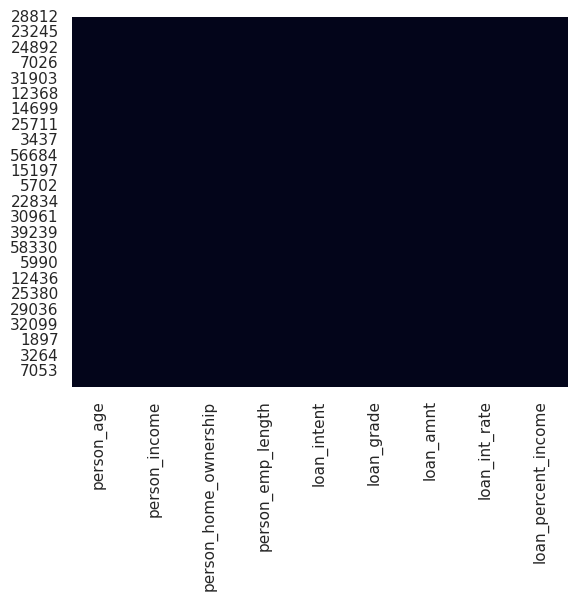

In [673]:
sns.heatmap(x_train.isna(), cbar = False)

<Axes: >

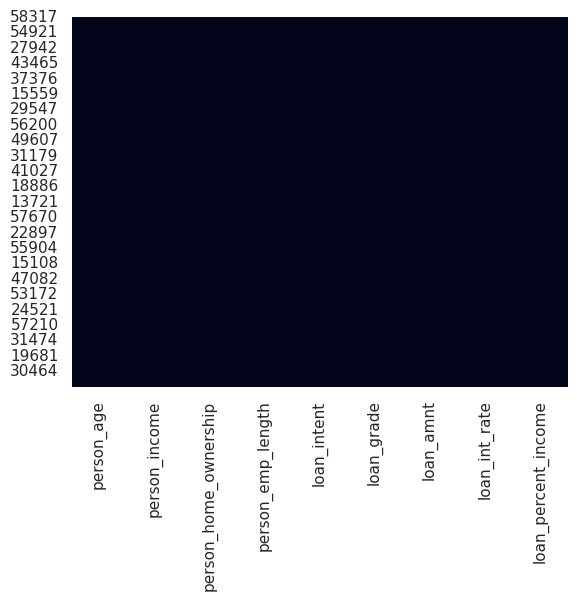

In [674]:
sns.heatmap(x_val.isna(), cbar = False)

<Axes: >

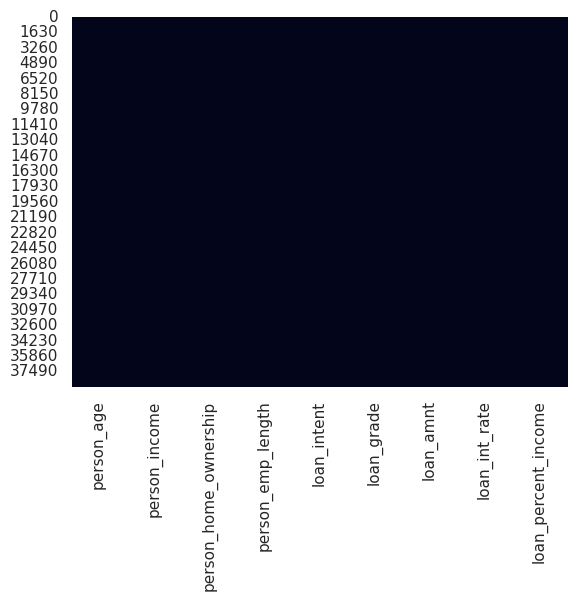

In [675]:
sns.heatmap(test.isna(), cbar = False)

Using above all 3 graphs we can say that our data does not contain NULL Values

Checking Information of the datasets

In [676]:
print('Information about X_Train :\n')
print(x_train.info())
print('\n' + ' * '* 20 + '\n')
print('Information about X_Validation :\n')
print(x_val.info())
print('\n' + ' * '* 20 + '\n')
print('Information about Test :\n')
print(test.info())

Information about X_Train :

<class 'pandas.core.frame.DataFrame'>
Index: 43983 entries, 28812 to 17673
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   person_age             43983 non-null  int64
 1   person_income          43983 non-null  int64
 2   person_home_ownership  43983 non-null  int8 
 3   person_emp_length      43983 non-null  int64
 4   loan_intent            43983 non-null  int8 
 5   loan_grade             43983 non-null  int8 
 6   loan_amnt              43983 non-null  int16
 7   loan_int_rate          43983 non-null  int64
 8   loan_percent_income    43983 non-null  int64
dtypes: int16(1), int64(5), int8(3)
memory usage: 2.2 MB
None

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Information about X_Validation :

<class 'pandas.core.frame.DataFrame'>
Index: 14662 entries, 58317 to 40443
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtyp

In [677]:
#Checking Statistical Measure of all Datasets

print('Statistical Measures of X_Train dataset :\n')
x_train.describe().T

Statistical Measures of X_Train dataset :



,count,mean,std,min,25%,50%,75%,max
person_age,43983.0,27.295159,5.142984,20.0,23.0,26.0,30.0,40.0
person_income,43983.0,62195.880158,26694.217232,4200.0,42000.0,58000.0,75600.0,126000.0
person_home_ownership,43983.0,1.097947,0.967528,0.0,0.0,2.0,2.0,2.0
person_emp_length,43983.0,4.638178,3.657405,0.0,2.0,4.0,7.0,14.0
loan_intent,43983.0,2.520519,1.720389,0.0,1.0,3.0,4.0,5.0
loan_grade,43983.0,1.042630,0.984984,0.0,0.0,1.0,2.0,3.0
loan_amnt,43983.0,239.072028,129.315459,0.0,129.0,229.0,331.0,495.0
loan_int_rate,43983.0,10.090058,3.058931,5.0,7.0,10.0,12.0,20.0
loan_percent_income,43983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [678]:
print('Statistical Measures of X_Validation dataset :\n')
x_val.describe().T

Statistical Measures of X_Validation dataset :



,count,mean,std,min,25%,50%,75%,max
person_age,14662.0,27.249761,5.117069,20.0,23.0,26.0,30.0,40.0
person_income,14662.0,62279.510367,26632.277115,9600.0,42000.0,58000.0,76000.0,126000.0
person_home_ownership,14662.0,1.099714,0.965902,0.0,0.0,2.0,2.0,2.0
person_emp_length,14662.0,4.577206,3.650457,0.0,2.0,4.0,7.0,14.0
loan_intent,14662.0,2.516164,1.730449,0.0,1.0,3.0,4.0,5.0
loan_grade,14662.0,1.042764,0.982147,0.0,0.0,1.0,2.0,3.0
loan_amnt,14662.0,238.321307,130.092722,2.0,129.0,229.0,331.0,495.0
loan_int_rate,14662.0,10.085732,3.037375,5.0,7.0,10.0,12.0,20.0
loan_percent_income,14662.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [679]:
print('Statistical Measures of Test dataset :\n')
test.describe().T

Statistical Measures of Test dataset :



,count,mean,std,min,25%,50%,75%,max
person_age,39098.0,27.295821,5.125672,20.0,23.0,26.0,30.0,40.0
person_income,39098.0,62273.014758,26628.372978,4000.0,42000.0,58000.0,75885.0,126712.0
person_home_ownership,39098.0,1.097422,0.967169,0.0,0.0,2.0,2.0,2.0
person_emp_length,39098.0,4.616118,3.636083,0.0,2.0,4.0,7.0,14.0
loan_intent,39098.0,2.538826,1.713407,0.0,1.0,3.0,4.0,5.0
loan_grade,39098.0,1.038698,0.979657,0.0,0.0,1.0,2.0,3.0
loan_amnt,39098.0,215.254463,115.340695,0.0,118.0,202.0,295.0,445.0
loan_int_rate,39098.0,10.072766,3.040459,5.0,7.0,10.0,12.0,20.0
loan_percent_income,39098.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

Dist Plot

In [680]:
"""
def draw_distplot(dataset, variables, nrows, ncols, title_of_dataset, color):
    #fig = plt.figure(figsize = (21, 26), dpi = 150)
    fig = plt.figure(figsize = (15, 15), dpi = 100)
    title = 'Distribution Of '+ title_of_dataset + ' Dataset'
    plt.suptitle(title, fontsize = 24)
    
    colors = sns.color_palette(color, n_colors = 27)
    
    for i, var in enumerate(variables):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        sns.distplot(x = dataset[var], color = colors[i], ax = ax)
        ax.set_title(var + " Distribution")
        ax.legend(loc='best')
        
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
datasets = [x_train, x_val, test]
dataset_title = ['X_Train', 'X_Validation', 'Test']

#colors = ['summer', 'husl', 'Set3']
colors = ['spring','nipy_spectral_r','hsv_r'] #'Paired']  #'BuPu_r'] #'mako'] #'flare'] #'Greens_d'] #'CMRmap']  #'Dark2']    #Accent']

for i, data in enumerate(datasets):
    draw_distplot(data, data.columns, 5, 2, dataset_title[i], colors[i])
    
"""


'\ndef draw_distplot(dataset, variables, nrows, ncols, title_of_dataset, color):\n    #fig = plt.figure(figsize = (21, 26), dpi = 150)\n    fig = plt.figure(figsize = (15, 15), dpi = 100)\n    title = \'Distribution Of \'+ title_of_dataset + \' Dataset\'\n    plt.suptitle(title, fontsize = 24)\n    \n    colors = sns.color_palette(color, n_colors = 27)\n    \n    for i, var in enumerate(variables):\n        ax = fig.add_subplot(nrows, ncols, i + 1)\n        sns.distplot(x = dataset[var], color = colors[i], ax = ax)\n        ax.set_title(var + " Distribution")\n        ax.legend(loc=\'best\')\n        \n    fig.tight_layout(rect=[0, 0, 1, 0.97])\n    plt.show()\n    \ndatasets = [x_train, x_val, test]\ndataset_title = [\'X_Train\', \'X_Validation\', \'Test\']\n\n#colors = [\'summer\', \'husl\', \'Set3\']\ncolors = [\'spring\',\'nipy_spectral_r\',\'hsv_r\'] #\'Paired\']  #\'BuPu_r\'] #\'mako\'] #\'flare\'] #\'Greens_d\'] #\'CMRmap\']  #\'Dark2\']    #Accent\']\n\nfor i, data in enumerate

Box Plot

In [681]:
"""
def draw_boxplot(dataset, variables, nrows, ncols, title_of_dataset, color):
    #fig = plt.figure(figsize = (26, 20), dpi = 200)
    fig = plt.figure(figsize = (15, 15), dpi = 150)
    title = 'Box Plot Of '+ title_of_dataset + ' Dataset'
    plt.suptitle(title, fontsize = 24)
    
    colors = sns.color_palette(color, n_colors = 27)
    
    for i, var in enumerate(variables):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        sns.boxplot(x = dataset[var], notch=True, showcaps=True, color = colors[i], ax = ax)
        ax.set_title(var + " Distribution")
        ax.legend(loc='best')
        
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
datasets = [x_train, x_val, test]
dataset_title = ['X_Train', 'X_Validation', 'Test']

colors = ['summer', 'husl', 'Set3']
for i, data in enumerate(datasets):
    draw_boxplot(data, data.columns, 5, 2, dataset_title[i], colors[i])

"""

'\ndef draw_boxplot(dataset, variables, nrows, ncols, title_of_dataset, color):\n    #fig = plt.figure(figsize = (26, 20), dpi = 200)\n    fig = plt.figure(figsize = (15, 15), dpi = 150)\n    title = \'Box Plot Of \'+ title_of_dataset + \' Dataset\'\n    plt.suptitle(title, fontsize = 24)\n    \n    colors = sns.color_palette(color, n_colors = 27)\n    \n    for i, var in enumerate(variables):\n        ax = fig.add_subplot(nrows, ncols, i + 1)\n        sns.boxplot(x = dataset[var], notch=True, showcaps=True, color = colors[i], ax = ax)\n        ax.set_title(var + " Distribution")\n        ax.legend(loc=\'best\')\n        \n    fig.tight_layout(rect=[0, 0, 1, 0.97])\n    plt.show()\n    \ndatasets = [x_train, x_val, test]\ndataset_title = [\'X_Train\', \'X_Validation\', \'Test\']\n\ncolors = [\'summer\', \'husl\', \'Set3\']\nfor i, data in enumerate(datasets):\n    draw_boxplot(data, data.columns, 5, 2, dataset_title[i], colors[i])\n\n'

Let's see whether our targets have class imbalance or not

In [682]:
targets = ['loan_status']
datasets = [y_train, y_val]
dataset_name = ['Y_Train', 'Y_Validation']

for i, data in enumerate(datasets):
    print('\n' + ' * ' * 30 + '\n')
    print('                                Dataset Name :', dataset_name[i])
    print('\n' + ' * ' * 30 + '\n')
    for var in targets:
        print(data[var].value_counts())
        print('\n' + ' * ' * 10 + '\n')


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

                                Dataset Name : Y_Train

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

loan_status
0    37693
1     6290
Name: count, dtype: int64

 *  *  *  *  *  *  *  *  *  * 


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

                                Dataset Name : Y_Validation

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

loan_status
0    12602
1     2060
Name: count, dtype: int64

 *  *  *  *  *  *  *  *  *  * 



Here we can say that we have Class Imbalance

In [683]:
smote = SMOTE(sampling_strategy='not majority', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
x_val_smote, y_val_smote = smote.fit_resample(x_val, y_val)

In [684]:
datasets = [y_train_smote, y_val_smote]
dataset_name = ['Y_Train', 'Y_Validation']

for i, data in enumerate(datasets):
    print('\n' + ' * ' * 30 + '\n')
    print('                                Dataset Name :', dataset_name[i])
    print('\n' + ' * ' * 30 + '\n')
    print(data.value_counts())


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

                                Dataset Name : Y_Train

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

loan_status
0              37693
1              37693
Name: count, dtype: int64

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

                                Dataset Name : Y_Validation

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

loan_status
0              12602
1              12602
Name: count, dtype: int64


In [685]:
X = x_train_smote
y = y_train_smote

In [686]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [687]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(loss='log'),
    'SVC': SVC(probability=True),
    'NuSVC': NuSVC(nu = 0.04, probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'MLPClassifier': MLPClassifier(),
    'XGBClassifier': XGBClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose = False),
    'LGBMClassifier': LGBMClassifier(verbose = -1)
}


In [688]:
"""
for name, model in models.items():
    logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])    
    logreg_pipeline.fit(X_train, y_train)
    print(f'{name} Trained \n')
    print(' * ' * 35 +'\n')
"""

"\nfor name, model in models.items():\n    logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),\n                                      ('classifier', model)])    \n    logreg_pipeline.fit(X_train, y_train)\n    print(f'{name} Trained \n')\n    print(' * ' * 35 +'\n')\n"

In [689]:
results_train = {}
for name, model in models.items():  
    logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])  
    logreg_pipeline.fit(X_train, y_train)
    
    y_pred=logreg_pipeline.predict(X_test)
    
    probabilities = logreg_pipeline.predict_proba(X_test)[:, 1]
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, probabilities) #, multi_class='ovr')

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, logreg_pipeline.predict(X_test))
    conf = []
    conf.append(conf_matrix)
    
    logloss = log_loss(y_test, probabilities)
        
    results_train[name] = [roc_auc, accuracy, logloss, conf]
    #results_train[name] = [accuracy, accuracy, logloss, conf]
    
    print(name + "'s Training Results Recorded")


LogisticRegression's Training Results Recorded
SGDClassifier's Training Results Recorded
SVC's Training Results Recorded
NuSVC's Training Results Recorded
KNeighborsClassifier's Training Results Recorded
GaussianNB's Training Results Recorded
BernoulliNB's Training Results Recorded
DecisionTreeClassifier's Training Results Recorded
RandomForestClassifier's Training Results Recorded
GradientBoostingClassifier's Training Results Recorded
AdaBoostClassifier's Training Results Recorded
BaggingClassifier's Training Results Recorded
ExtraTreesClassifier's Training Results Recorded
MLPClassifier's Training Results Recorded
XGBClassifier's Training Results Recorded
CatBoostClassifier's Training Results Recorded
LGBMClassifier's Training Results Recorded


In [690]:
def print_results(results, dataset):
    print('\n' + ' * ' * 30 + '\n')
    print('                                Dataset Name :', dataset)
    print('\n' + ' * ' * 30 + '\n')
    for (model, result) in zip(results.keys(), results.values()):
        print('Model Name :', model)
        print('ROC Score :', result[0])
        print('Accuracy Score :', result[1])
        print('Log Loss :', result[2])
        print('\n' + ' * ' * 15 +'\n')
        
print_results(results_train, 'Training Dataset')


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

                                Dataset Name : Training Dataset

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : LogisticRegression
ROC Score : 0.805211663084435
Accuracy Score : 0.7254940973603926
Log Loss : 0.5346814273638769

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : SGDClassifier
ROC Score : 0.8032484559104005
Accuracy Score : 0.7243666268735907
Log Loss : 0.5386295642229951

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : SVC
ROC Score : 0.8101929795299042
Accuracy Score : 0.7432683379758589
Log Loss : 0.5352858594245405

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : NuSVC
ROC Score : 0.5759316177329612
Accuracy Score : 0.4489985409205465
Log Loss : 0.6815194690463622

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : KNeighborsClassifier
ROC Score : 0.8137840259215625
Accuracy Sc

Compute ROC curve and ROC area for each class

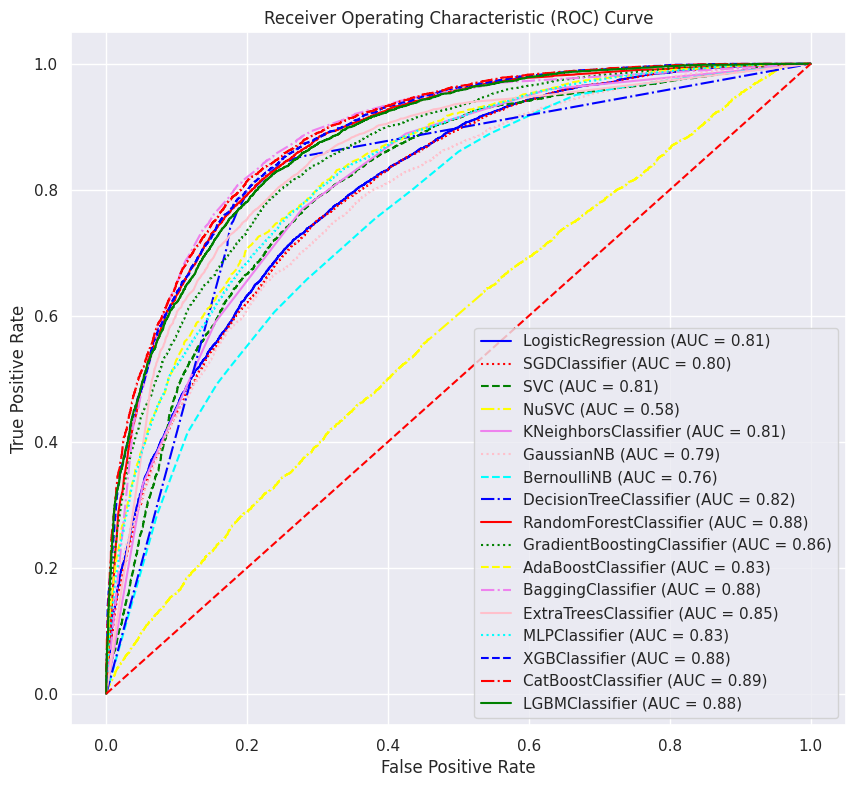

In [693]:
i=0
colors = ['blue', 'red', 'green', 'yellow', 'violet', 'pink', 'cyan',
         'blue', 'red', 'green', 'yellow', 'violet', 'pink', 'cyan',
          'blue', 'red', 'green', 'yellow', 'violet', 'pink', 'cyan',
          'blue', 'red', 'green', 'yellow', 'violet', 'pink', 'cyan']

lnstyle=['solid', 'dotted', 'dashed', 'dashdot', 
         'solid', 'dotted', 'dashed', 'dashdot',
         'solid', 'dotted', 'dashed', 'dashdot',
         'solid', 'dotted', 'dashed', 'dashdot',
         'solid', 'dotted', 'dashed', 'dashdot',
         'solid', 'dotted', 'dashed', 'dashdot', ]

plt.figure(figsize=(10, 9))
#plt.plot(fpr, tpr, color='blue', label= ({auc:.2f}))# = {auc:.2f}))

for name, model in models.items():    
    #print(model)
    mod_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])  
    mod_pipeline.fit(X_train, y_train)    

    y_pred_proba = mod_pipeline.predict_proba(X_test)[:, 1]    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, color=colors[i], linestyle=lnstyle[i], label=f"{name} (AUC = {auc:.2f})")
    i+=1

#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [696]:
for name, model in models.items():    
    class_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    # Fit the model
    class_pipeline.fit(X_train, y_train)

    # Predict and evaluate
    test_preds = class_pipeline.predict(X_test)
    print(name+" Results:")
    print(classification_report(y_test, test_preds))
    print("Accuracy:", accuracy_score(y_test, test_preds))
    print('')
    print('********************************************************************************************')
    print('')


LogisticRegression Results:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      7518
           1       0.72      0.74      0.73      7560

    accuracy                           0.73     15078
   macro avg       0.73      0.73      0.73     15078
weighted avg       0.73      0.73      0.73     15078

Accuracy: 0.7254940973603926

********************************************************************************************

SGDClassifier Results:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      7518
           1       0.74      0.69      0.72      7560

    accuracy                           0.72     15078
   macro avg       0.72      0.72      0.72     15078
weighted avg       0.72      0.72      0.72     15078

Accuracy: 0.7230401910067649

********************************************************************************************

SVC Results:
              precision    recall 